# Probabilidad y Estadística

El objetivo del siguiente notebook es afianzar algunos conceptos de Probabilidad y, de paso, empezar a ver cómo se hacen gráficos con Matplotlib, una nueva librería que veremos más en detalle en la próxima bitácora y encuentro. Por ahora, solamente tienen que instalarla y correr las celdas. ¡No te preocupes si no entiendes lo que hacen esas celdas! Lo importante es que prestes atención a sus resultados.

## 1. Distribuciones de probabilidad

El concepto de distribución de probabilidad es un concepto central en probabilidad y estadística y, por lo tanto, hay mucho para decir. Nos limitamos acá a los puntos más importantes.


### 1.1 Distrubución Uniforme Discreta

Comencemos por un ejemplo: un dado de seis caras. La probabilidad de que al tirar el dado *salga* una cara es $1/6$. Si graficamos la probabilidad para cada resultado posible de tirar un dado, obtendríamos un gráfico como el siguiente:

In [1]:
import sys
print(sys.executable)
import numpy as np
import matplotlib.pyplot as plt

/usr/local/opt/python@3.9/bin/python3.9


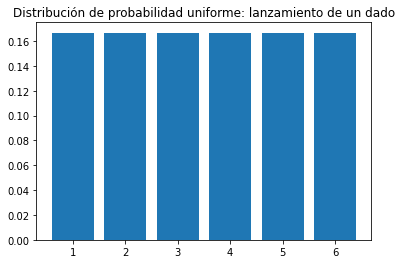

In [2]:
# los posibles resultados
valores = np.arange(1,7)

# las probabilidades para graficar
probas = np.zeros(6) + 1/6

# graficar
plt.bar(valores, probas)
plt.title('Distribución de probabilidad uniforme: lanzamiento de un dado')
# plt.savefig('distribucion_dado.png', dpi = 400)
plt.show()

En este caso, decimos que la distribución de probabilidad es *uniforme discreta*, ya que le asigna la misma probabilidad a los seis valores que pueden salir al tirar el dado. Si el dado estuviera cargado, ya no sería uniforme.

**Algunos detalles**:
1. El resultado de tirar un dado es un ejemplo de una *variable aleatoria*.
2. En el caso del dado, la variable aleatoria puede tomar valores *discretos* y *acotados* (limitados): 1, 2, 3, 4, 5 y 6
3. Existen variables aleatorias donde los posibles valores que puede tomar son continuos y no acotados. Veremos la distribución más famosa de ellas a continuación.

### 1.2 Distribución Normal o Gaussiana

La distribución normal o gaussiana debe ser la distribución más famosa dentro de las distribuciones. Es una distribución de variable continua y aparece en una infinidad de ámbitos de la ciencia. Muchas variables asociadas a fenómenos naturales siguen una distribución gaussiana; un ejemplo típico es la estatura de las personas. La forma que tiene esta distribución está dada por la siguiente fórmula:

$$f(x|\mu, \sigma^2)=\frac{1}{\sqrt{2 \pi \sigma^2}}e^{\frac{-(x - \mu)^2}{2\sigma^2}}$$

¡No te asustes si no la entiendes! Durante el encuentro, veremos más en detalle algunos aspectos de esta distribución. Pero es importante resaltar que tiene sólo dos parámetros: su valor medio $\mu$ y su desviacíon estándar $\sigma$. Estos valores son *teóricos*, es decir, son propios de la distribución de probabilidad. 

Recomendamos entrar en la página de Wikipedia de la [Distribución Normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal) y prestar atención al primer gráfico - dónde podrán ver la forma teórica de la distribución - y a la sección "Propiedades".


**Distribución Normal en NumPy**

Como mencionamos en el encuentro anterior, NumPy nos provee de herramientas para generar valores aleatorios de distribuciones. A continuación generamos, usando `np.random.normal()`, muestras de dos distribuciones normales, con el mismo valor medio pero distinta desviación estándar. **Consultar** la ayuda de la función para entender bien qué hace.

In [3]:
mu = 2.0
sigma_1 = 5.0
sigma_2 = 2.0
muestras_1 = np.random.normal(loc = mu, scale = sigma_1, size = 400)
muestras_2 = np.random.normal(loc = mu, scale = sigma_2, size = 400)
print(muestras_1, muestras_2)

[ -0.69770359   9.39632708  11.77358634   4.65051682  -1.03902609
   8.05807068   6.78974435   6.2772173    4.35429443  -4.90075479
  -2.81132279   2.90941635  -5.43940168   2.99304086  10.35097829
  -4.06785992  -5.28825835   3.40257588   6.68855056   2.63063539
   7.00530774   8.54592456  -5.38898652   2.65775992   4.83737595
   4.05759288  10.98058493   4.39422492   1.53089776   7.41114399
   0.82943137  -0.57053854  -0.38968736   6.92761689   0.52131926
  -6.8896345    2.78620673   3.39354211  -2.26332558  -3.62612111
   6.50082617   3.34622938   3.74282833  -8.66072323   4.20101391
   6.05518612   4.88390325   1.35290335  -3.73804836  15.63761645
   8.57872497   3.24507874  -2.8439451   -4.76627334  -3.37207525
  -2.47284011   6.58528671  -1.77311258   2.47790385   2.01604511
  -1.32429385  -3.62471428  -3.57279187  -1.32938319  11.57791265
   2.39763504  -4.84590649   2.18711471  -8.37773502  13.99615316
   1.81499355  -5.32461286   0.99756061  12.02261491   2.07023448
   3.59800

Notar que son dos "tiras" de números, bastante largas y que a simple vista no nos dicen mucho. Mejor, podemos graficar su histograma. Veremos bien qué es un histograma en la próxima bitácora. Por ahora, basta saber que es una forma de visualizar cómo está distribuida una tira de números. Lo que hace es tomar un número determinado de intervalos (`bins = 20`) y contar cuántas muestras caen en cada intervalo.

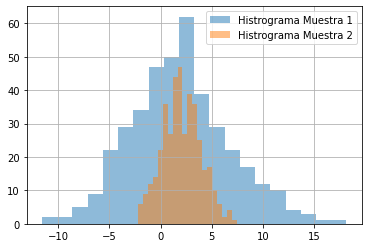

In [4]:
plt.hist(muestras_1, bins = 20, alpha = 0.5, label = 'Histrograma Muestra 1')
plt.hist(muestras_2, bins = 20, alpha = 0.5, label = 'Histrograma Muestra 2')
plt.legend()
plt.grid()
plt.show()

**Ejercicio:** Volver a "generar" las muestas y hacer sus histogramas. ¿Cambió?¿Por qué? Googlear que es una *semilla* (`seed`) en NumPy e implementar. También, cambiar la cantidad de muestras, modificando el argumento `size`. 

### 1.3 Relación entre Probabilidad y Estadística

**Promedio y desviación estándar en una distribución Normal**

En una distribución normal, el promedio de las muestras obtenidas *tiende* al valor medio $\mu$ de la distribución, y la desviación estándar *tiende* a la desviacíon estándar $\sigma$ de la distribución. Notar, entonces, que existen valores calculados (promedio, desviación estándar) y valores teóricos ($\mu$ y $\sigma$). Confundirlos entre sí es un error común.

Veamos un ejemplo. Nuevamente, obtenemos muestras de una distribución normal:

In [5]:
mu = 8.5
sigma = 3.0
muestras = np.random.normal(loc = mu, scale = sigma, size = 100)

Y calculamos su promedio y desviación estándar, y comparamos con $\mu$ y $\sigma$.

In [6]:
print('Valor medio teorico:', mu, '. Valor medio calculado:', muestras.mean())
print('Desviacion estandar teorica:', sigma, '. Desviacion estandar calculada:', muestras.std())

Valor medio teorico: 8.5 . Valor medio calculado: 7.963303321807251
Desviacion estandar teorica: 3.0 . Desviacion estandar calculada: 2.8132821674624537


Comparemos el histograma de las muestras y la distribución teórica, que graficaremos haciendo uso de la librería `SciPy`:

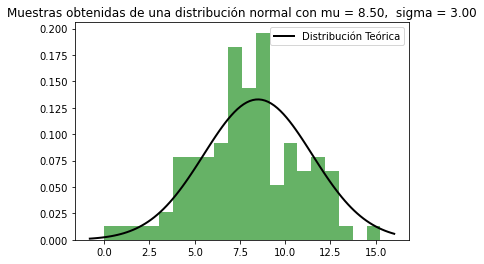

In [7]:
from scipy.stats import norm

plt.hist(muestras, bins=20, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label = 'Distribución Teórica')

title = "Muestras obtenidas de una distribución normal con mu = %.2f,  sigma = %.2f" % (mu, sigma)

plt.title(title)
plt.legend()
plt.show()

**Nota:** si estás atento/a a la escala en el eje *y*, notarás que es distinta a la escala de los histogramas anteriores. Esto se debe a que, en un histograma, además de graficar la cantidad de muestras que entran en cada intervalo, podemos también graficar la **proporción** de muestras que entran en cada intervalo.

**Para pensar y probar:** 
1. ¿Por qué no coinciden $\mu$ y $\sigma$ con los valores calculados?¿Qué podemos hacer para que se parezcan cada vez más?¿Y qué ocurre en ese caso con el histograma y la distribución teórica?
2. Con respecto al ejercicio que acabamos de hacer, ¿cuáles son los *parámetros* asociados al mundo de las probabilidades y cuáles son los *valores estadísticos* asociados al mundo de la estadística?


### Ejercitación
 
Los siguientes ejercicios pueden parecer muy difíciles, pero te aseguramos que no lo son tanto. ¡Lo importante es que los intentes!

**Ejercicio 1 - Challenge:** Muchos juegos de mesa requieren tirar dados y sumar sus resultados. Por ejemplo, el [Catán](https://es.wikipedia.org/wiki/Los_Colonos_de_Cat%C3%A1n). Es evidente que, mientras en un dado la probabilidad de que salga cada cara es la misma, en esta variable aleatoria todos los resultados no son igual de probables (¿Cuáles son los posibles resultados?). Entonces, para mejorar tu estrategia en estos juegos, es útil saber cuál es la probabilidad asociada a cada resultado. Para ello, debes calcular su distribución de probabilidad. Entonces, 

Obtener la distribución de la variable aleatoria *suma del resultado de tirar dos dados*. Para ello puedes intentar alguna o ambas de las siguientes opciones:
1. **Obtener la distribución teórica:** para ello, basta contar los casos *a mano* con lápiz y papel. Por ejemplo:
    1. Uno (1) es un resultado imposible
    2. Dos (2) solamente puede ser obtenida con ambos dados en 1, 1 + 1
    3. Tres (3) tiene dos opciones, 2 + 1 y 1 + 2
    4. Cuatro (4) tiene tres opciones: 3 + 1, 2 + 2, 1 + 3
    
    y así para el resto de los posibles resultados. Completa la lista hasta el 12 y cuenta cuántas combinaciones existen para cada resultado. ¿Cuántos combinaciones debe haber en total, teniendo en cuenta que cada dado tiene seis caras? Al final, debes llevarlos a porcentaje. Por ejemplo, si en total son 100 posibles combinaciones, y el 12 tiene 10 posibles combinaciones, su probabilidad es 10/100 = 0.1
    
2. **Simular y obtener una distribución aproximada:** otra opción es simular esta situación. Viste en el notebook de la bitácora anterior cómo simular un dado. Ahora simula dos dados y obtiene la suma de sus resultados.

¿Te animas a comparar ambos métodos?

In [8]:
# COMPLETAR: UNA LINEA DE CODIGO 
# COMPLETAR: OTRA LINEA DE CODIGO 
# el numero de bins se determina como la raiz cubica 

suma = # COMPLETAR

plt.hist(suma, bins = np.arange(1.5,13.5,1), density=True, rwidth = 0.8,)
plt.show()

SyntaxError: invalid syntax (<ipython-input-8-21d8ead59414>, line 5)

**Ejercicio 2:** Obtiene, simulando, la distribución de la variable aleatoria *máximo valor obtenido al tirar dos dados.* Por ejemplo, si obtenemos 2 y 5, el resultado es 5. Nuevamente, si lo deseas, también puedes contar casos y obtener la distribución teórica.

In [ ]:
# COMPLETAR: UNA LINEA DE CODIGO 
# COMPLETAR: OTRA LINEA DE CODIGO 

'''Combinamos las muestras obtenidas en un arreglo de dos filas, donde
cada columna corresponde a una tirada'''
muestras = np.array([COMPLETAR,COMPLETAR])
print(muestras.shape)


'''Obtenemos el máximo de cada tirada. Recordar obtener el máximo
en el eje (axis) correspondiente'''
maximos = np.max(COMPLETAR, axis = COMPLETAR)

plt.hist(COMPLETAR, bins = np.arange(0.5,7.5,1), density=True, rwidth = 0.8)
plt.show()

## 2. Correlación

El objetivo de esta sección es que te familiarices con los conceptos de **Covarianza** y **Correlación**. Si bien las fórmulas parecen difíciles, esperemos que veas que nada es tan grave como parece. También que prestes atención a cómo a veces es útil simular datos para aprender o acercarse a algunas técnicas.

Tenemos dos variables aleatorias $X$ e $Y$, de las cuales tenemos $n$ muestras de cada una, $x_1,x_2,..., x_n$ e $y_1,y_2,..., y_n$. Sus valores medios son $\bar{x}$ e $\bar{y}$, respectivamente. Definimos la Covarianza como

$$Cov(X,Y) = \sum_{i=1}^{n} \frac{(x_i - \bar{x})(y_i - \bar{y})}{n}$$

A veces verás que, en lugar de dividir por $n$, se divide por $n - 1$ ó $n - 2$, pero eso no es importante ahora. Según Wikipedia, "la covarianza es un valor que indica el grado de variación conjunta de dos variables aleatorias respecto a sus medias. Es el dato básico para determinar si existe una dependencia entre ambas variables y además es el dato necesario para estimar otros parámetros básicos, como el coeficiente de correlación lineal o la recta de regresión.". 

Si bien la fórmula puede parecer difícil, veamos qué nos dice de nuestros datos simulando algunos casos sencillos.

Empezamos generandos muestras al azar de dos variables aleatorias no relacionadas entre sí. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
n = 1000
sigma_1 = 2
sigma_2 = 20
x = np.random.normal(size = n, scale = sigma_1)
y = np.random.normal(size = n, scale = sigma_2)

# Graficamos
plt.scatter(x, y)
plt.grid()
plt.xlim([-60,60])
plt.ylim([-60,60])
plt.show()

¿Hay alguna relación entre ellos? Por relación nos referimos a "variación conjunta". Y por "variación conjunta" podemos imaginarnos que si una de las variables aumenta, la otra también lo hace. Y si una variable disminuye su valor, la otra también lo hace. La covarianza intenta cuantificar esa relación.

In [ ]:
cov = np.sum((x - x.mean())*(y - y.mean()))/x.size
print(cov)

La covarianza, sin embargo, tiene un pequeño problema: depende de la escala de nuestros datos. Entonces, para deshacernos de la escala, se puede definir la Correlación, que no es otra cosa que la covarianza dividida la desviación estándar de cada variable aletaria.

$$Corr(X,Y) = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$

In [ ]:
corr = cov/(x.std()*y.std())
print(corr)

Y con eso nos deshacemos de la escala. Un valor cercano a cero nos indica que no existe una relación (¿lineal?) entre las variables.

**Probar** con distintas escalas (modificando `sigma_1` y `sigma_2`) y verán que `cov` tomará valores en un rango muy amplio, mientras que `corr` se mantendrá cercana a cero.

### 2.1 Relación lineal

Veamos otro ejemplo: sabemos que existe una relación lineal entre $X$ e $Y$, es decir, podemos aproximar $Y =aX+b$, donde $a$ y $b$ son la pendiente y la ordenada al origen.

In [ ]:
n = 100
x = np.linspace(-1,1,n) + 0.25*np.random.normal(size = n)
y = 4.5*x + 0.25*np.random.normal(size = n)

# Graficamos
plt.scatter(x, y)
plt.grid()
plt.show()

La covarianza nos da

In [ ]:
cov = np.sum((x - x.mean())*(y - y.mean()))/x.size
print(cov)

In [ ]:
corr = cov/(x.std()*y.std())
corr

Ahora, en cambio, el valor es cercano a uno, indicando una relación lineal creciente entre ambas variables.

**Probar** cambiando la pendiente de la función lineal (el número que multiplica a `x` en `y = ...`) y mirar qué pasa. ¿Qué pasa si la pendiente es negativa?

#### Conclusiones

1. La covarianza es una medida de la variación conjunta de dos variables. Pero tiene un problema: depende de la escala.
2. Para "deshacernos" de la escala, definimos la correlación, que es simplemente la covarianza dividida por el producto de la desviación estándar de cada variable. **Para pensar:** ¿por qué la desviación estándar está asociada a la escala de una variable?
3. La correlación es un valor entre -1 y 1. La correlación toma un valor cercano a uno cuando hay una relación lineal creciente entre las variables, cero cuando no hay relación y -1 cuando hay una relación lineal decreciente.
4. Esta correlación tiene un nombre particular: **Correlación de Pearson**.

### 2.2 Covarianza y Correlación con NumPy

**Esta sección es opcional**

NumPy ya tiene incorporadas funciones que calculan la covarianza y la correlación entre dos variables. La única diferencia es que, en lugar de devolver un único valor, devuelve cuatro valores, que corresponden a la covarianza/correlación entre $X$ con $X$, $X$ con $Y$, $Y$ con $X$, e $Y$ con $Y$. ¿Por qué, en la correlación, algunos valores son exactamente uno (1.)?

In [ ]:
np.cov([x,y])

In [ ]:
np.corrcoef([x,y])

### 2.3 Relación No-Lineal entre variables

**Esta sección es opcional, pero recomendamos leerla**

¿Qué ocurre cuando la relación no es lineal entre las variables? Veámoslo con un ejemplo.


In [ ]:
n = 1000
x = np.linspace(-5,5,n) + 0.25*np.random.normal(size = n)
y = x**2 + 0.25*np.random.normal(size = n)

# Graficamos
plt.scatter(x, y)
plt.grid()
plt.show()

La covarianza nos da

In [ ]:
cov = np.sum((x - x.mean())*(y - y.mean()))/x.size
print(cov)

In [ ]:
corr = cov/(x.std()*y.std())
corr

Notar que la correlación de un valor alrededor de cero, indicando que no hay una correlación entre ambas variables. Pero esto NO indica que no hay una *relación* entre esas variables, solamente nos dice que no es lineal. Por eso es muy importante graficar.

**Probar** cambiando la relación matemática entre `x` e `y` y mirar qué pasa.

Para tratar con relaciones no lineal entre variables, existen otros tipos de correlaciones. La que vimos se llama **Correlación de Pearson**, que es la más famosa. Pero también existen otras, Spearman y Kendall, que son muy útiles cuando existe una relación no lineal entre variables.

### 3. Correlación en Pandas

Probablemente ya estés un poco mareado/a con tantos términos, conceptos y líneas de código. Si no entendiste del todo lo anterior, no te preocupes. Vamos a ver cómo lo aplicamos en un conjunto de datos. ¡Verás que es muy sencillo!

Para eso, volvemos a usar el Iris Dataset del encuentro anterior.

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('DS_Bitácora_04_Iris.csv')
data.drop(columns = 'Id', inplace = True)
data.head()

Para obtener las correlaciones entre las distintas variables, simplemente tenemos que hacer:

In [ ]:
data.corr()

**Para responder**: ¿Cuáles variables están correlacionadas entre sí?¿Por qué los elementos de la diagonal son exactamente uno (1.0)?

Dentro de dos encuentros veremos una forma más eficiente de visualizar esta información, ¡pero ya puedes aplicarla!